# MDD and DP maps
@author: Max Felius

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
#important functions
def compute_mdd(dp, std, z_crit):
    # Find the critical value of the sample distribution
    z_a = st.norm.ppf(dp, loc=0, scale=std)
    return (abs(z_a) + z_crit) * std

def compute_dp(mdd, std, z_crit):
    # Convert mdd from mm to in terms of the factor of the std
    mdd = mdd / std
    # Find the critical value of the sample distribution
    z_a = mdd - z_crit
    # Find the DP (confidence interval) of the sample
    dp = st.norm.cdf(z_a, loc=0, scale=std)
    return dp * 100

# for i,std in enumerate(sigma):
#     std = 1000*std
#     z_crit = st.norm.ppf(1-alpha, loc=0, scale=std)
# #     print(z_crit)
#     mdd = compute_mdd(dp, std, z_crit)
#     mdd_saved[0,i] = mdd #to [m]

In [3]:

# z_crit = st.norm.ppf(1-alpha, loc=mu1, scale=sigma)

# print(k_a)

<ipython-input-30-e238134e6141>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(mu1,np.max(y1)+0.01), xytext=(mu2,np.max(y2)+0.01), arrowprops=dict(arrowstyle='<->'),fontsize='xx-large')


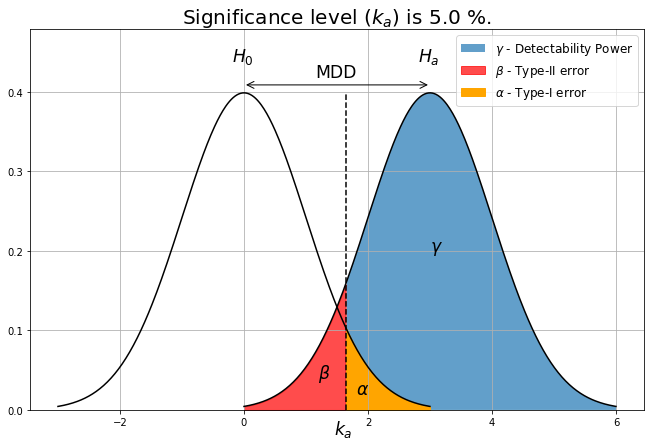

In [30]:
variance = 1
sigma = np.sqrt(variance)
alpha = 0.05
n = 400

#nul hypothesis
mu1 = 0
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma,n)
y1 = st.norm.pdf(x1,mu1,sigma)

#alternative hypothesis
mu2 =3
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma,n)
y2 = st.norm.pdf(x2,mu2,sigma)

#location significance level alpha
k_a = st.norm.ppf(1-alpha, loc=mu1, scale=sigma)
y_k_a = np.linspace(0,np.max(y2),n)
x_k_a = np.array([k_a for _ in range(n)])

#total figure
x_total = np.linspace(mu1 - 3* sigma , mu2 + 3*sigma,n)
y1_total = st.norm.pdf(x_total,mu1,sigma)
y2_total = st.norm.pdf(x_total,mu2,sigma)

fig, ax = plt.subplots(figsize=(11,7))
# fig, ax = plt.subplots(figsize=(30,15))

#plot the figures
ax.plot(x1,y1,c='k')
ax.plot(x2,y2,c='k')

#location k_a
ax.plot(x_k_a,y_k_a,'k--')

#fillers
ax.fill_between(x2, y2, 0, where = (x2 >= k_a),alpha=0.7,label='$\gamma$ - Detectability Power')
ax.fill_between(x2, y2, 0, where = (x2 <= k_a),alpha=0.7,color='red',label='$\\beta$ - Type-II error')
ax.fill_between(x1, y1, 0, where = (x1 >= k_a),color='orange',label='$\\alpha$ - Type-I error')

#write letters for the areas
plt.text(mu2,0.2,'$\gamma$',fontsize='xx-large') #gamma, dp
plt.text(mu1+1.8,0.02,'$\\alpha$',fontsize='xx-large') #alpha, Type-I
plt.text(mu1+1.2,0.04,'$\\beta$',fontsize='xx-large') #beta, Type-II

#hypothesis
plt.text(mu1-0.19,np.max(y1)+0.04,'$H_0$',fontsize='xx-large')
plt.text(mu2-0.19,np.max(y2)+0.04,'$H_a$',fontsize='xx-large')
plt.text(k_a-0.19,0-0.03,'$k_a$',fontsize='xx-large')

#mdd
ax.annotate(s='', xy=(mu1,np.max(y1)+0.01), xytext=(mu2,np.max(y2)+0.01), arrowprops=dict(arrowstyle='<->'),fontsize='xx-large')
plt.text((mu2-mu1-0.7)/2,np.max(y1)+0.02,'MDD',fontsize='xx-large')

ax.legend(fontsize=12)
ax.set_ylim([0,1.2*np.max(y2)])
ax.set_title('Significance level ($k_a$) is {} %.'.format(alpha*100),fontsize=20)
ax.grid(True);

In [31]:
fig.savefig('Hypothesis_test.png')

# Show one tailed and two tailed test

In [ ]:
variance = 1
sigma = np.sqrt(variance)
alpha1 = 0.05
alpha2 = 1 - alpha1
n = 400

#nul hypothesis
mu1 = 0
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma,n)
y1 = st.norm.pdf(x1,mu1,sigma)

#alternative hypothesis
mu2 =3
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma,n)
y2 = st.norm.pdf(x2,mu2,sigma)

#location significance level alpha
k_a1 = st.norm.ppf(1-alpha1, loc=mu1, scale=sigma)

#two tailed test
#location significance level alpha
k_a_two_tail_r = st.norm.ppf(1-(alpha1/2), loc=mu1, scale=sigma)
k_a_two_tail_l = st.norm.ppf(1-(alpha2+(alpha1/2)), loc=mu1, scale=sigma)

k_a2 = st.norm.ppf(1-alpha2, loc=mu1, scale=sigma)

# one tailed
y_k_a = np.linspace(0,np.max(y2),n)
x_k_a = np.array([k_a1 for _ in range(n)])

# two tailed
y_k_a_r = np.linspace(0,np.max(y2),n)
x_k_a_r = np.array([k_a_two_tail_r for _ in range(n)])

y_k_a_l = np.linspace(0,np.max(y2),n)
x_k_a_l = np.array([k_a_two_tail_l for _ in range(n)])

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(15,10))

#plot the figures
ax[0].plot(x1,y1,c='k',label='Gaussian Distribution')
# ax[0].plot(x2,y2,c='k')

#location k_a
ax[0].plot(x_k_a,y_k_a,'k--')
ax[0].fill_between(x1, y1, 0, where = (x1 >= k_a1),color='orange',label='$\\alpha$ - Type-I error')
ax[0].text(k_a-0.19,0-0.03,'$k_a$',fontsize='xx-large')

ax[0].legend()
ax[0].set_title('One-Tailed Test with significance level {} %'.format(alpha1*100))
ax[0].set_ylim([0,1.2*np.max(y2)])
ax[0].grid(True);

#-------------PLOT TWO----------------------
#plot the figures
ax[1].plot(x1,y1,c='k',label='Gaussian Distribution')
# ax[1].plot(x2,y2,c='k')

#location k_a
ax[1].plot(x_k_a_r,y_k_a_r,'k--')
ax[1].plot(x_k_a_l,y_k_a_l,'k--')
ax[1].fill_between(x1, y1, 0, where = (x1 >= k_a_two_tail_r),color='orange',label='$\\alpha$ - Type-I error')
ax[1].fill_between(x1, y1, 0, where = (x1 <= k_a_two_tail_l),color='orange')#,label='$\\alpha$ - Type-I error')
ax[1].text(k_a_two_tail_l-0.19,0-0.03,'$k_a$',fontsize='xx-large')
ax[1].text(k_a_two_tail_r-0.19,0-0.03,'$k_a$',fontsize='xx-large')

ax[1].legend()
ax[1].set_title('Two-Tailed Test with significance level {} %'.format(alpha1*100))
ax[1].set_ylim([0,1.2*np.max(y2)])
ax[1].grid(True);

# critical region

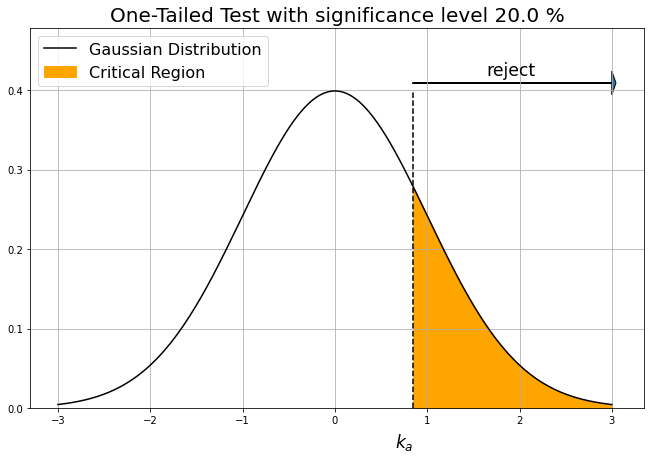

In [27]:
alpha3 = 0.2

k_a1 = st.norm.ppf(1-alpha3, loc=mu1, scale=sigma)

# one tailed
y_k_a = np.linspace(0,np.max(y2),n)
x_k_a = np.array([k_a1 for _ in range(n)])

fig, ax = plt.subplots(ncols=1,figsize=(11,7))

#plot the figures
ax.plot(x1,y1,c='k',label='Gaussian Distribution')
# ax[0].plot(x2,y2,c='k')

#location k_a
ax.plot(x_k_a,y_k_a,'k--')
ax.fill_between(x1, y1, 0, where = (x1 >= k_a1),color='orange',label='Critical Region')
ax.text(k_a1-0.19,0-0.05,'$k_a$',fontsize='xx-large')

#reject arrow
ax.arrow(k_a1,np.max(y2)+0.01,(np.max(x1)-k_a1),0,head_width=0.03,ec='black')
ax.text(k_a1+0.8,np.max(y2)+0.02,'reject',fontsize='xx-large')

ax.legend(fontsize=16)
ax.set_title('One-Tailed Test with significance level {} %'.format(alpha3*100),fontsize=20)
ax.set_ylim([0,1.2*np.max(y2)])
ax.grid(True);

In [28]:
fig.savefig('Critical_region.png')